# Step 1: Install library

In [1]:
pip install mplfinance tensorflow pandas vnstock numpy scikit-learn vnstock3

Note: you may need to restart the kernel to use updated packages.


# Step 2: Import data

In [3]:
from vnstock3 import *
stock = Vnstock().stock(symbol='NKG')
company = Company(symbol='FPT')

2024-11-14 09:48:51 - vnstock3.common.data.data_explorer - INFO - Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
2024-11-14 09:48:51 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


In [4]:
    from datetime import date
    import pandas as pd
    end_date = date.today().strftime('%Y-%m-%d')
    data = stock.quote.history(start = '1999-01-01', end = end_date)
    df = pd.DataFrame(data)
    df = df[['time', 'open', 'high', 'low', 'close', 'volume']]
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    df

,open,high,low,close,volume
time,,,,,
2017-08-10,757.9,757.9,745.5,745.9,367
2017-08-11,746.0,746.4,743.4,745.7,510
2017-08-14,745.9,748.9,745.7,748.9,707
2017-08-15,750.3,750.9,748.0,748.0,916
2017-08-16,747.7,748.4,745.1,748.1,1065
...,...,...,...,...,...
2024-11-08,1337.5,1340.3,1318.3,1324.0,220730
2024-11-11,1323.6,1324.0,1306.1,1320.1,233948
2024-11-12,1321.1,1323.5,1302.7,1310.0,246958


In [5]:
df_news = company.news()
pd.set_option('display.max_colwidth', None)
df_news = pd.DataFrame(df_news, columns=['publish_date', 'title', 'price_change_ratio'])
df_news

,publish_date,title,price_change_ratio
0,2024-10-18 17:37:00,FPT: Thông cáo báo chí về kết quả kinh doanh quý 3/2024,0.000
1,2024-10-14 16:43:00,FPT: Báo cáo kết quả phát hành cổ phiếu ESOP cho CBNV có thành tích đóng góp trong năm 2023,-0.014
2,2024-10-14 16:42:00,FPT: Báo cáo kết quả giao dịch cổ phiếu ESOP của người nội bộ và người có liên quan,-0.014
3,2024-10-14 16:41:00,FPT: Báo cáo kết quả phát hành cổ phiếu theo chương trình lựa chọn cho người lao động,-0.014
4,2024-10-14 16:40:00,FPT: Thông báo thay đổi số lượng cổ phiếu có quyền biểu quyết đang lưu hành,-0.014
5,2024-10-14 16:39:00,FPT: Trưởng BKS đăng ký bán 60.000 cổ phiếu,-0.014
6,2024-10-10 09:04:00,VNDirect: FPT hoãn ra mắt Dự án Trung tâm dữ liệu lớn nhất Việt Nam,0.047
7,2024-10-04 17:53:00,FPT: Thông báo giao dịch mua cổ phiếu ESOP của Người nội bộ và Người liên quan,0.001
8,2024-09-30 17:21:00,FPT: Thông báo phát hành ESOP cho cán bộ lãnh đạo cấp cao năm 2024,0.002
9,2024-09-30 17:20:00,FPT: Thông báo phát hành ESOP cho CBNV có thành tích đóng góp năm 2023,0.002


test 80 train 20

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Chuyển đổi dữ liệu về dạng numpy và chuẩn hóa
data = df.values  # Chứa cả 5 cột open, high, low, close, volume
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Chia tập dữ liệu thành train và test
training_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size:]

# Tạo các tập dữ liệu x_train và y_train với nhiều đầu ra
def create_multi_output_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, :])  # Input với nhiều đặc trưng (open, high, low, close, volume)
        Y.append(dataset[i, :])  # Output với nhiều biến
    return np.array(X), np.array(Y)

time_step = 60
X_train, y_train = create_multi_output_dataset(train_data, time_step)
X_test, y_test = create_multi_output_dataset(test_data, time_step)

# Reshape dữ liệu cho phù hợp với mô hình LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])


# Step 3: Prepare data and pre-process

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Chuyển đổi dữ liệu về dạng numpy và chuẩn hóa
data = df.values  # Chứa cả 5 cột open, high, low, close, volumescaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'volume']])

# 3. Chuẩn bị dữ liệu đầu vào và đầu ra
X_train = []
y_train = []

time_step = 120  # Sử dụng 90 ngày trước để dự đoán
for i in range(time_step, len(scaled_data)):
    X_train.append(scaled_data[i-time_step:i, :])
    y_train.append(scaled_data[i, :])

X_train, y_train = np.array(X_train), np.array(y_train)

# Step 4: Build model LSTM and save model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import load_model
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set TensorFlow to use the second GPU (index 1)
        tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
        print(f"Running on GPU: {gpus[1].name}")
    except RuntimeError as e:
        print(e)

# Xây dựng mô hình LSTM với nhiều đầu ra
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=5))  # Đầu ra là 5 giá trị: open, high, low, close, volume

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')
model.save('lstm_stock_model.h5')
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=50, batch_size=32)
loaded_model = load_model('lstm_stock_model.h5')

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0112
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0018
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0018
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0015
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0014
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0012
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0011
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0013
Epoch 9/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0013
Epoch 10/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0012
Epoch 11/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0011
Epoch 12/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0012
Epoch 13/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0011
Epoch 14/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0011
Epoch 15/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s

# Step 5: Use model to predict and data visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
                  open        high         low       close        volume
2024-10-22  145.983797  147.328317  144.624896  145.799907  4.603300e+06
2024-10-23  147.812160  149.335200  146.458122  147.734567  5.182352e+06
2024-10-24  149.794166  151.372527  148.448503  149.728247  5.513843e+06
2024-10-25  152.000297  153.613073  150.659772  151.928835  5.814848e+06
2024-10-28  154.323353  155.970433  152.984600  154.248843  6.08

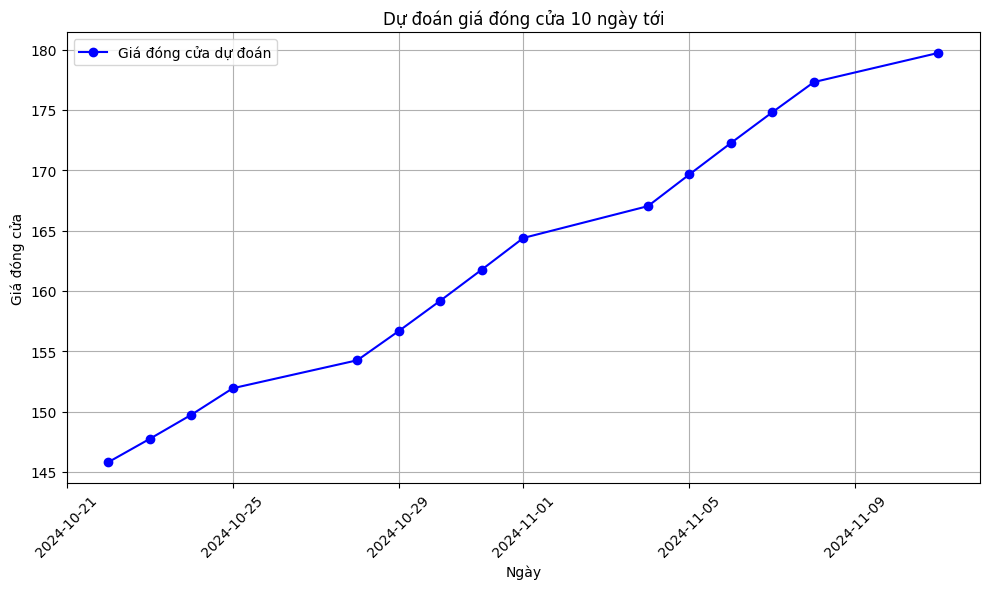

In [9]:
import matplotlib.pyplot as plt
import mplfinance as mpf
# 6. Dự đoán giá 5 ngày tiếp theo
# Lấy dữ liệu 60 ngày gần nhất để dự đoán 5 ngày tới
last_60_days = scaled_data[-time_step:]
X_test = np.array([last_60_days])  # Chuyển thành mảng 3D (1, 60, 5)

predicted_prices = []

for i in range(15):  # Dự đoán 5 ngày tới
    pred_price = model.predict(X_test)
    predicted_prices.append(pred_price[0])
    
    # Mở rộng chiều của pred_price để phù hợp với X_test
    pred_price_reshaped = np.reshape(pred_price, (1, 1, 5))  # Tạo mảng (1, 1, 5)
    
    # Thêm giá trị dự đoán vào X_test để dự đoán cho ngày tiếp theo
    X_test = np.append(X_test[:, 1:, :], pred_price_reshaped, axis=1)  # Nối vào trục thời gian (axis=1)

# Đưa các giá trị dự đoán về thang đo ban đầu
predicted_prices = scaler.inverse_transform(predicted_prices)

# 7. Hiển thị kết quả dự đoán
predicted_df = pd.DataFrame(predicted_prices, columns=['open', 'high', 'low', 'close', 'volume'])
predicted_df.index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=15, freq='B')  # Dự đoán ngày kế tiếp
print(predicted_df)

# 8. Vẽ biểu đồ dự đoán giá đóng cửa cho 5 ngày tiếp theo
predicted_df['volume'] = predicted_df['volume'].astype(int)
'''
mpf.plot(predicted_df, type='candle', style='charles', volume=True, title='Biểu đồ nến dự đoán giá 15 ngày tới',
         ylabel='Giá', ylabel_lower='Khối lượng giao dịch', datetime_format='%Y-%m-%d', tight_layout=True)
'''
# Vẽ biểu đồ giá đóng cửa dự đoán cho 5 ngày tới
plt.figure(figsize=(10, 6))
plt.plot(predicted_df.index, predicted_df['close'], label='Giá đóng cửa dự đoán', marker='o', color='b')
plt.title('Dự đoán giá đóng cửa 10 ngày tới')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
from vnstock import *
import pandas as pd
import datetime as dt
import pandas_ta as ta
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [ ]:
def histogram(histogram_after, histogram_present):
    if histogram_present > 0:
        if histogram_after > histogram_present: 
            return 2  # tích cực
        elif histogram_after < histogram_present:
            return 0  # suy yếu
    elif histogram_present < 0:
        if histogram_after < histogram_present:
            return 1  # tiêu cực
        elif histogram_after > histogram_present:
            return 3  # cải thiện
    return 4  # duy trì xu hướng


In [46]:
fpt = stock_historical_data(symbol="FPT", start_date="1999-01-01", end_date="2025-12-03")
bbands = ta.bbands(fpt['close'], length=20, std=2)
fpt['BBL'] = bbands['BBL_20_2.0']
fpt['BBM'] = bbands['BBM_20_2.0']
fpt['BBU'] = bbands['BBU_20_2.0']
fpt['BBB'] = bbands['BBB_20_2.0']
fpt['BBP'] = bbands['BBP_20_2.0']
MACD = ta.macd(fpt['close'], fast=12, slow=26, signal=9)
fpt['MACD'] = MACD['MACD_12_26_9']
fpt['Signal'] = MACD['MACDs_12_26_9']
fpt['Histogram'] = MACD['MACDh_12_26_9']
fpt['Supertrend'] = ta.supertrend(fpt['high'], fpt['low'], fpt['close'], length=10, multiplier=3)['SUPERT_10_3.0']
fpt['RSI'] = ta.rsi(fpt['close'], length=14)
fpt = pd.DataFrame(fpt, columns=['time', 'BBL', 'BBM', 'BBU', 'MACD', 'Signal','Histogram', 'Supertrend', 'RSI'])
fpt = fpt.dropna()
fpt.tail(20)

,time,BBL,BBM,BBU,MACD,Signal,Histogram,Supertrend,RSI
3158,2024-11-11,131366.536573,134278.5,137190.463427,252.119950,97.575517,154.544433,130745.307032,61.405256
3159,2024-11-12,131379.657498,134268.5,137157.342502,347.947785,147.649971,200.297815,130745.307032,55.516060
3160,2024-11-13,131274.162435,134343.0,137411.837565,498.833437,217.886664,280.946773,130745.307032,58.399727
3161,2024-11-14,131305.522256,134293.5,137281.477744,468.571957,268.023723,200.548234,130745.307032,51.912602
3162,2024-11-15,131212.655453,134139.5,137066.344547,272.799322,268.978842,3.820479,130745.307032,45.550346
3163,2024-11-18,131109.053451,134065.0,137020.946549,124.284587,240.039991,-115.755404,130745.307032,45.892041
3164,2024-11-19,130324.587308,133911.0,137497.412692,-310.184616,129.995070,-440.179686,138420.685341,36.183949
3165,2024-11-20,130089.196288,133821.5,137553.803712,-457.188299,12.558396,-469.746695,137175.116807,43.852263
3166,2024-11-21,129951.839819,133757.0,137562.160181,-519.288753,-93.811034,-425.477719,137175.116807,45.626123
3167,2024-11-22,129942.981229,133752.0,137561.018771,-491.027983,-173.254424,-317.773560,137175.116807,48.238393


In [3]:
from vnstock import *
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
fpt_news = company_news(symbol="FPT", page_size=1000)
fpt_news['publishDate'] = pd.to_datetime(fpt_news['publishDate'])
fpt_news['publishDate'] = fpt_news['publishDate'].dt.date
fpt_news = pd.DataFrame(fpt_news, columns=['publishDate', 'title', 'rsi', 'rs', 'priceChangeRatio', 'priceChange', 'priceChangeRatio1M', 'price'])
fpt_news

,publishDate,title,rsi,rs,priceChangeRatio,priceChange,priceChangeRatio1M,price
0,2024-12-16,"FPT báo lợi nhuận sau thuế 11 tháng tăng trưởng 21%, thắng thầu 45 dự án lớn với quy mô trên 5 triệu USD",67.9,83.0,0.003,400.0,0.126,149900.0
1,2024-12-10,'Ông lớn' tài chính Nhật Bản muốn mua 35% vốn công ty con 5 ngày tuổi của FPT,66.6,82.0,0.017,2500.0,0.088,149500.0
2,2024-12-02,"Cú bắt tay ra mắt nhà máy AI sẽ đem lại ""bước nhảy"" đột biến về doanh thu cho FPT?",70.3,89.0,-0.008,-1104.0,0.078,142200.0
3,2024-11-29,Niềm vui của cổ đông FPT,62.1,85.0,0.035,4866.0,0.066,143304.0
4,2024-11-26,FPT: Thông báo về ngày đăng ký cuối cùng tạm ứng cổ tức đợt 1 năm 2024 bằng tiền,48.2,69.0,0.010,1291.0,0.002,134267.0
5,2024-11-20,FPT chốt danh sách chi 1.460 tỷ trả cổ tức đợt 1/2024,36.2,50.0,0.018,2383.0,-0.023,131486.0
6,2024-11-19,FPT: Quyết định về việc chốt danh sách cổ đông tạm ứng cổ tức đợt 1 năm 2024 bằng tiền,45.9,60.0,-0.030,-3972.0,-0.041,129103.0
7,2024-11-19,FPT: Báo cáo kết quả giao dịch cổ phiếu của Người nội bộ Nguyễn Việt Thắng,45.9,60.0,-0.030,-3972.0,-0.041,129103.0
8,2024-11-19,"FPT cán mốc tỷ đô doanh thu từ thị trường nước ngoài, cổ đông nhận gần 1.500 tỷ đồng tiền cổ tức chỉ sau 2 tuần ""lăn chốt""",45.9,60.0,-0.030,-3972.0,-0.041,129103.0
9,2024-11-14,"FPT bắt tay NVIDIA ra mắt Nhà máy AI tại Nhật Bản, biên lợi nhuận dịch vụ cho thuê GPU sẽ ra sao?",58.4,74.0,-0.013,-1787.0,-0.012,135062.0
